# Trasnformada de Fourier y Musica Digital

La transformada de Fourier es una herramienta matemática que permite descomponer una señal en sus componentes de frecuencia. Es decir, dada una señal $f(t)$, la transformada de Fourier nos permite encontrar la cantidad de cada frecuencia presente en la señal. Esta transformada se define como:

$$ F(\omega) = \int_{-\infty}^{\infty} f(t)e^{-i\omega t}dt $$

Donde $F(\omega)$ es la función de transformada de Fourier, $f(t)$ es la señal original, $\omega$ es la frecuencia angular, y $i$ es la unidad imaginaria.

La música digital utiliza la transformada de Fourier para representar las señales de audio en formato digital. En particular, la transformada de Fourier discreta (DFT) se utiliza para convertir señales analógicas en señales digitales. La DFT se define como:

$$ X_k = \sum_{n=0}^{N-1} x_n e^{-i 2\pi nk/N} $$

Donde $X_k$ es la k-ésima componente de frecuencia de la señal digital, $x_n$ es la n-ésima muestra de la señal analógica, y $N$ es el número total de muestras.

La música digital utiliza la DFT para convertir señales analógicas en señales digitales y para comprimirlas para que ocupen menos espacio de almacenamiento. Sin la transformada de Fourier, la música digital no sería posible, ya que la mayoría de los formatos de música digital se basan en la representación de señales de audio en el dominio de la frecuencia.

In [1]:
import numpy as np

from scipy.io import wavfile
from scipy.fftpack import dct

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


%matplotlib inline

In [2]:
from pydub import AudioSegment

In [3]:
def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X

In [4]:
PATH_MP3_FILE = 'D:/Music/Abigail Williams/Abigail Williams - 2009 - In The Shadow Of A Thousand Suns (Agartha)/01 i am (god).mp3'
PATH_WAV_FILE = 'D:/Music/Abigail Williams/Abigail Williams - 2009 - In The Shadow Of A Thousand Suns (Agartha)/01 i am (god).mp3'
PATH_WAV_FILE = 'D:/diva_satanica_2.wav'
PATH_GIF_FILE = 'D:/'

In [5]:
# Convertir archivo MP3 a WAV
# sound = AudioSegment.from_mp3(PATH_MP3_FILE)
# sound.export(PATH_WAV_FILE, format="wav")

# Leer archivo de audio
fs, audio = wavfile.read(PATH_WAV_FILE)

# Convertir señal de audio a arreglo NumPy
x = audio[0:int(audio.shape[0]/100000), 0]  # tomar solo el canal izquierdo, si es estéreo
# x = audio[:, 0]  # tomar solo el canal izquierdo, si es estéreo

In [6]:
# Obtener la transformada de Fourier discreta
X = DFT(x)
X = np.fft.fft(x)

In [7]:
# Aplicar la transformada de coseno discreta
X_dct = dct(X)

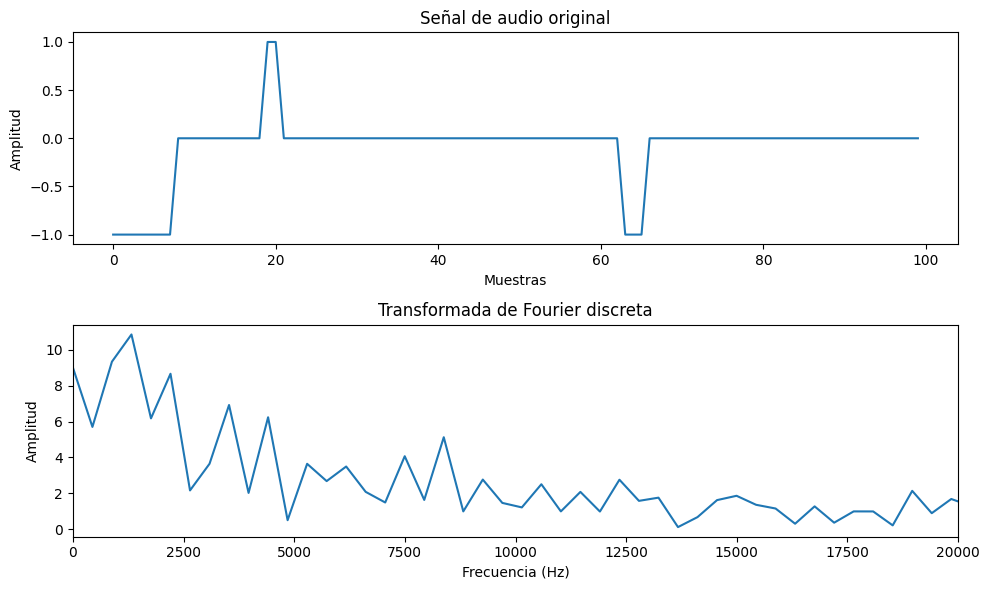

In [8]:
# Graficar la señal de audio original
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(x)
ax[0].set_xlabel('Muestras')
ax[0].set_ylabel('Amplitud')
ax[0].set_title('Señal de audio original')

# Graficar la transformada de Fourier discreta
freq = np.fft.fftfreq(len(x), 1/fs)
ax[1].plot(freq[:len(freq)//2], np.abs(X[:len(X)//2]))
ax[1].set_xlabel('Frecuencia (Hz)')
ax[1].set_ylabel('Amplitud')
ax[1].set_title('Transformada de Fourier discreta')
ax[1].set_xlim([0, 20000])
plt.tight_layout()
plt.show()

In [9]:
# Leer el archivo de audio
fs, audio = wavfile.read(PATH_WAV_FILE)

# Convertir señal de audio a arreglo NumPy
x = audio[:, 0]

# Calcular la transformada de Fourier de la señal
X = np.fft.fft(x)

In [10]:

CHUNK_SIZE = 1000

# Crear la figura y el eje para el gráfico
fig, ax = plt.subplots()

# Inicializar el gráfico con los datos en cero
line, = ax.plot([], [])
ax.set_xlim(0, len(X))
ax.set_ylim(0, 1000)

# Función que se llamará en cada frame de la animación
# def update(i):
#     # Calcular la transformada de Fourier de los primeros i elementos de la señal
#     X_i = np.fft.fft(x[:i])
    
#     # Actualizar los datos del gráfico
#     line.set_data(np.arange(len(X_i)), np.abs(X_i))
    
#     return line,
def update(frame):
    # # Leer un nuevo trozo de datos de la señal de audio
    # start = frame
    # end = start + CHUNK_SIZE
    # if end > len(x):
    #     end = len(x)
    # y = x[start:end]

    # # Aplicar la transformada de Fourier
    # Y = np.fft.fft(y)

    # # Actualizar los datos de la línea
    # line.set_ydata(np.abs(Y[0:int(len(Y)/2)]) / CHUNK_SIZE)

    # Leer un nuevo trozo de datos de la señal de audio
    start = frame
    end = start + CHUNK_SIZE
    if end > len(x):
        end = len(x)
    y = x[start:end]

    # Aplicar la transformada de Fourier
    Y = np.fft.fft(y)

    # Calcular la amplitud normalizada de las frecuencias hasta la mitad de la señal
    amplitud = 2 * np.abs(Y[:int(len(Y)/2)]) / len(Y)
    

    # Actualizar los datos de la línea
    line.set_data(np.arange(len(amplitud)), amplitud)

    return line,



# Crear la animación
anim = FuncAnimation(fig, update, frames=np.arange(0, len(x), 10), blit=True)

# Guardar la animación en una ruta específica
anim.save(PATH_GIF_FILE + 'animacion.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# Mostrar la animación
plt.show()

In [ ]:
# import librosa
# import numpy as np

# # Cargar el archivo de audio
# x, sr = librosa.load(PATH_WAV_FILE)

# # Normalizar la señal
# x = librosa.util.normalize(x)

# # Agregar ceros para tener una longitud potencia de 2
# n = len(x)
# n_fft = 2**np.ceil(np.log2(n)).astype(int)
# x_pad = np.pad(x, (0, n_fft - n), mode='constant')
